In [76]:
library(tidyverse)

In [77]:
train = read.csv('/kaggle/input/ipba-17-regression-gemstone-non-graded/train.csv')
test = read.csv('/kaggle/input/ipba-17-regression-gemstone-non-graded/test.csv')

# Check Description Statistics

In [78]:
summary(train)

       id             carat            cut               color          
 Min.   :     0   Min.   :0.2000   Length:193573      Length:193573     
 1st Qu.: 48393   1st Qu.:0.4000   Class :character   Class :character  
 Median : 96786   Median :0.7000   Mode  :character   Mode  :character  
 Mean   : 96786   Mean   :0.7907                                        
 3rd Qu.:145179   3rd Qu.:1.0300                                        
 Max.   :193572   Max.   :3.5000                                        
   clarity              depth           table             x        
 Length:193573      Min.   :52.10   Min.   :49.00   Min.   :0.000  
 Class :character   1st Qu.:61.30   1st Qu.:56.00   1st Qu.:4.700  
 Mode  :character   Median :61.90   Median :57.00   Median :5.700  
                    Mean   :61.82   Mean   :57.23   Mean   :5.715  
                    3rd Qu.:62.40   3rd Qu.:58.00   3rd Qu.:6.510  
                    Max.   :71.60   Max.   :79.00   Max.   :9.650  
       y     

# Data Cleaning

In [79]:
colSums(is.na(train))
colSums(is.na(test))

id   carat     cut   color clarity   depth   table       x       y       z 
      0       0       0       0       0       0       0       0       0       0 
  price 
      0

id   carat     cut   color clarity   depth   table       x       y       z 
      0       0       0       0       0       0       0       0       0       0

# Correlation with target

In [80]:
lm <- lm(carat ~ depth,train)

In [81]:
summary(lm)


Call:
lm(formula = carat ~ depth, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61618 -0.39878 -0.08521  0.24717  2.69764 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0541997  0.0600883   0.902    0.367    
depth       0.0119133  0.0009718  12.259   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4625 on 193571 degrees of freedom
Multiple R-squared:  0.0007757,	Adjusted R-squared:  0.0007706 
F-statistic: 150.3 on 1 and 193571 DF,  p-value: < 2.2e-16


# Prediction

In [82]:
test_prediction <- predict(lm, test)

In [83]:
submission <- data.frame(test$id, test_prediction)

In [84]:
colnames(submission) <- c('id', 'price')

In [85]:
head(submission)

,id,price
,<int>,<dbl>
1,193573,0.7963994
2,193574,0.8023561
3,193575,0.7916341
4,193576,0.7880601
5,193577,0.8011647
6,193578,0.8011647


In [86]:
# Export
write.csv(submission, "submission.csv", row.names = FALSE)

# Scatter Plot

In [ ]:
ggplot(train, aes(x = depth, y = price)) +
  geom_point() +
  labs(title = "Scatter Plot: Depth vs. Price")

In [ ]:
ggplot(train, aes(x = carat, y = price)) +
  geom_point() +
  labs(title = "Scatter Plot: carat vs. Price")

In [ ]:
ggplot(train, aes(x = x, y = price)) +
  geom_point() +
  labs(title = "Scatter Plot: x vs. Price")

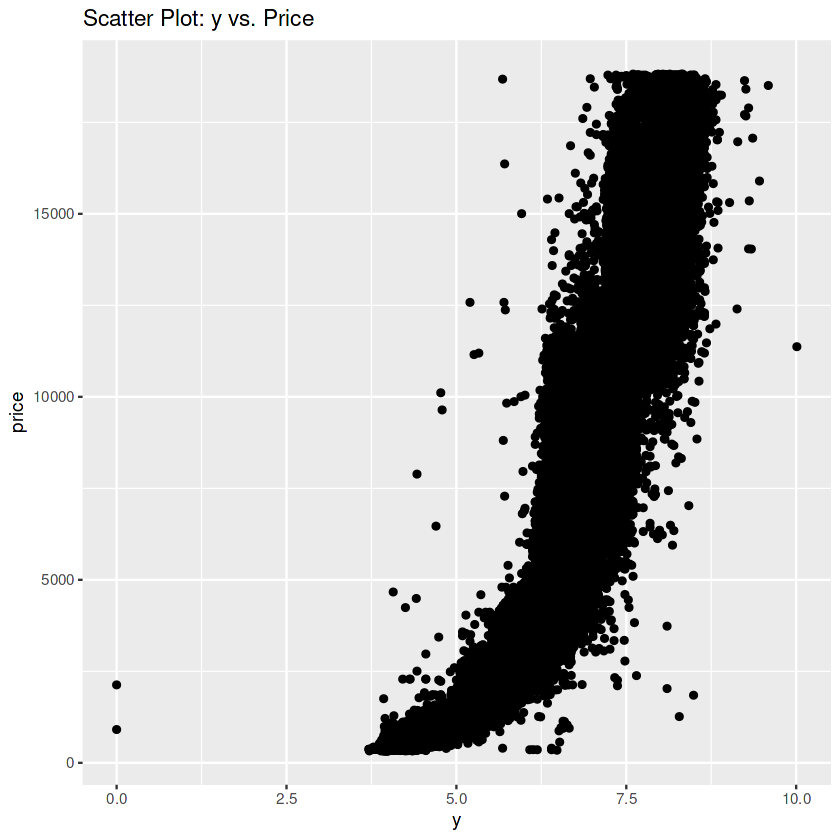

In [90]:
ggplot(train, aes(x = y, y = price)) +
  geom_point() +
  labs(title = "Scatter Plot: y vs. Price")

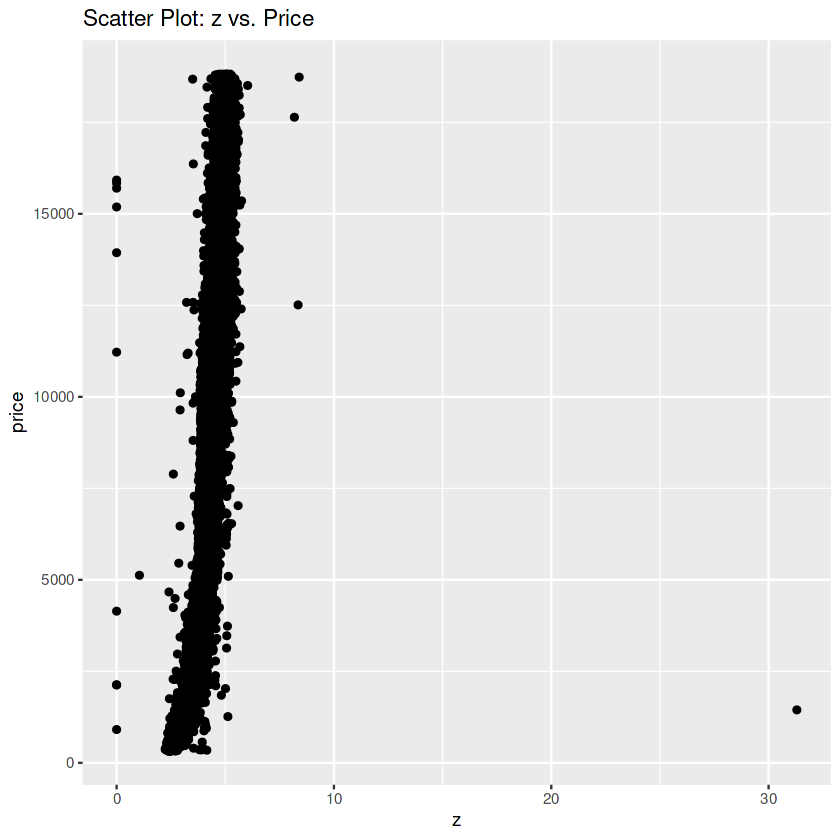

In [91]:
ggplot(train, aes(x = z, y = price)) +
  geom_point() +
  labs(title = "Scatter Plot: z vs. Price")

# Correlation heat map

In [92]:
numeric_train <- train[sapply(train, is.numeric)]


In [93]:
correlation_matrix <- cor(numeric_train)

In [94]:
library(corrplot)

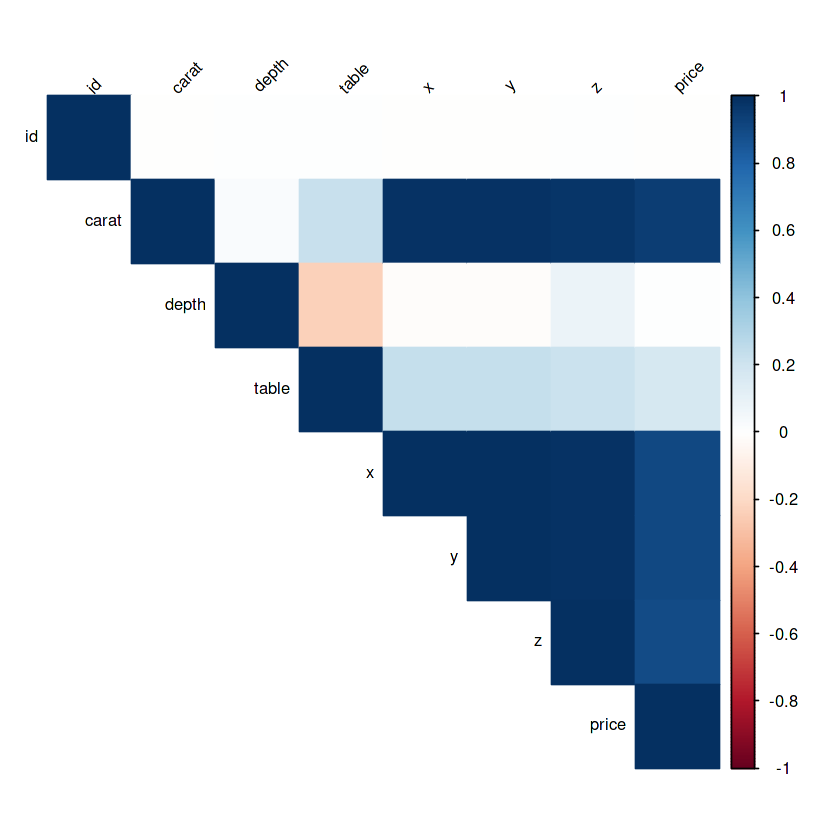

In [95]:
corrplot(correlation_matrix, method = "color", type = "upper",
         tl.col = "black", tl.srt = 45, tl.cex = 0.8)

# Not correlated with each other

In [96]:
target <- train[,ncol(train)]

In [97]:
data <- train[,1:(ncol(train)-1)]

In [98]:
class(train)

[1] "data.frame"

In [99]:
train_numeric <- as.numeric(unlist(train))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


# Linear Regression Model

In [100]:
lm(price ~ x + y + z + carat + depth,train)



Call:
lm(formula = price ~ x + y + z + carat + depth, data = train)

Coefficients:
(Intercept)            x            y            z        carat        depth  
   18140.66     -2480.75        82.77       -86.41     14002.43      -181.70  


In [101]:
summary(lm)


Call:
lm(formula = carat ~ depth, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61618 -0.39878 -0.08521  0.24717  2.69764 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0541997  0.0600883   0.902    0.367    
depth       0.0119133  0.0009718  12.259   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4625 on 193571 degrees of freedom
Multiple R-squared:  0.0007757,	Adjusted R-squared:  0.0007706 
F-statistic: 150.3 on 1 and 193571 DF,  p-value: < 2.2e-16


In [102]:
model1 =lm(price~., data=train)
summary(model1)


Call:
lm(formula = price ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-15025.0   -467.3   -137.8    338.9  16028.0 

Coefficients:
               Estimate Std. Error  t value Pr(>|t|)    
(Intercept)   1.218e+04  2.426e+02   50.195  < 2e-16 ***
id            1.190e-05  3.866e-05    0.308    0.758    
carat         1.441e+04  2.501e+01  576.112  < 2e-16 ***
cutGood       4.065e+02  2.335e+01   17.414  < 2e-16 ***
cutIdeal      5.895e+02  2.308e+01   25.543  < 2e-16 ***
cutPremium    5.307e+02  2.260e+01   23.485  < 2e-16 ***
cutVery Good  5.143e+02  2.266e+01   22.691  < 2e-16 ***
colorE       -1.781e+02  7.921e+00  -22.488  < 2e-16 ***
colorF       -2.520e+02  8.056e+00  -31.278  < 2e-16 ***
colorG       -3.653e+02  7.823e+00  -46.694  < 2e-16 ***
colorH       -8.730e+02  8.373e+00 -104.266  < 2e-16 ***
colorI       -1.427e+03  9.781e+00 -145.842  < 2e-16 ***
colorJ       -2.317e+03  1.369e+01 -169.239  < 2e-16 ***
clarityIF     3.820e+03  4.483e+01   8

In [ ]:
prediction= predict(model1, test)
prediction

In [ ]:
train_rmse <- sqrt(train_mse)

# MSE, RMSE for the train model

In [ ]:
Residual <- train$price - prediction

Warning message in train$price - prediction:
“longer object length is not a multiple of shorter object length”


In [ ]:
train_rmse <- sqrt(train_mse)

In [ ]:
train_mse <- mean(Residual^2)

In [ ]:
cat("Train MSE:", train_mse, "\n")
cat("Train RMSE:", train_rmse, "\n")

Train MSE: 31753501 
Train RMSE: 5635.024 


# Submission

In [ ]:
test$id <- as.integer(as.numeric(test$id))

In [ ]:
class(test$id)
newsubmission <- data.frame(id = test$id, price = prediction)
head(newsubmission)

[1] "integer"

,id,price
,<int>,<dbl>
1,193573,1130.1033
2,193574,2297.8727
3,193575,2259.3942
4,193576,1325.1748
5,193577,6778.4992
6,193578,661.6298


In [ ]:
write.csv(newsubmission,"newsubmission.csv",row.names=FALSE)

In [ ]:
model2 =lm(price~id+cut+color+clarity+depth+table, data=train)
summary(model2)


Call:
lm(formula = price ~ id + cut + color + clarity + depth + table, 
    data = train)

Residuals:
   Min     1Q Median     3Q    Max 
 -8564  -2412  -1079   1076  17648 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.102e+04  8.231e+02 -25.539  < 2e-16 ***
id           -1.587e-04  1.547e-04  -1.026   0.3051    
cutGood      -1.648e+02  9.293e+01  -1.773   0.0762 .  
cutIdeal      2.335e+02  9.199e+01   2.538   0.0111 *  
cutPremium    5.160e+02  9.037e+01   5.710 1.13e-08 ***
cutVery Good  1.832e+02  9.000e+01   2.035   0.0418 *  
colorE        1.585e+02  3.169e+01   5.002 5.67e-07 ***
colorF        8.874e+02  3.208e+01  27.665  < 2e-16 ***
colorG        1.568e+03  3.092e+01  50.695  < 2e-16 ***
colorH        1.937e+03  3.285e+01  58.964  < 2e-16 ***
colorI        2.721e+03  3.792e+01  71.740  < 2e-16 ***
colorJ        2.757e+03  5.348e+01  51.559  < 2e-16 ***
clarityIF    -1.151e+03  1.787e+02  -6.438 1.21e-10 ***
claritySI1    8.341e+02  1

In [113]:
prediction1 = predict(model2, test)
head(prediction1)

1        2        3        4        5        6 
2568.551 4516.824 4403.286 2783.663 5282.971 4568.906